In [1]:
### HALO index clustering - python-only pipeline



In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [3]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)


<module 'pipvis' from '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pipvis.py'>

# this part of the code is the actual clustering, don't need to run again

## masking edges

In [4]:
# bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
# grid = mf.import_bathy(bath)
# fmask = (grid.fmask[0,0,:,:]) 

# stn_x, stn_y = mf.make_stns(10)
# d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

# d_stn_xar = np.array(d_stn_x)
# d_stn_yar = np.array(d_stn_y)

# edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
# np.squeeze(edge)
# np.shape(edge)
# edgear = np.array(edge)
# edgear = edgear[0]

# d_stn_xar =np.delete(d_stn_xar,edge)
# d_stn_yar = np.delete(d_stn_yar,edge)

# print(np.size(d_stn_xar))



#### agglomerate signals extracted and save as .pkl, for year in 2013-2016

In [5]:
# # do this for years 2013  to 2016
# years = ['2013','2014','2015','2016']

# for year in years:
#     if year == '2016':
#         noday = 366
#     if year != '2016':
#         noday = 365
        
#     print(year)
#     basedir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/'


#     varfolder = 'HALO_TS'
#     tname = './pkls/halo_datamat_'+year+'.pkl'
#     signalmat = np.zeros([np.size(d_stn_xar),noday])
#     count = 0 
#     for i in range(0,580):
        
#         if i not in edgear:

#             pattern  = f'stn_{i}halo_depth_sp10.nc'
#             tdat = nc.Dataset(basedir+year +'/'+ varfolder +'/'+pattern)
#             signalmat[count,:] = tdat['halocline_depth'][:]
#             count = count+1

#     pickle.dump(signalmat, open(tname, 'wb'))


## open the resulting signalmats, cluster from 2-N (N=100) clusters, save linkage matrix and cluster matrices, visualise dendrograms

In [6]:
# for year in years:
#     print(year)
#     signalmat = pickle.load(open('./pkls/halo_datamat_'+year+'.pkl', 'rb'))

#     Z = linkage(signalmat, 'ward')
#     pickle.dump(Z, open('./pkls/halo_linkmat_'+year+'.pkl', 'wb'))
    
#     clustermat = np.zeros([100,np.size(d_stn_xar)])                           
#     for k in range(0,100): 
#         clustermat[k,:] = fcluster(Z, k+1, criterion='maxclust')
#     pickle.dump(clustermat, open('./pkls/halo_clustmat_'+year+'.pkl', 'wb'))

# From here down it's plotting

In [7]:
# fact = 1
# ms = 4
# markersize = 10
# legfontsize = 8

# fig = plt.figure(figsize=(10*fact, 10*fact))

# #####halo
# ax1 = plt.subplot2grid((2,2),(0,0))
# Z = pickle.load(open('./pkls/halo_linkmat_2013.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2013'); plt.xlabel('cluster size'); plt.ylabel('distance')

# ax1 = plt.subplot2grid((2,2),(0,1))
# Z = pickle.load(open('./pkls/halo_linkmat_2014.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2014'); plt.xlabel('cluster size'); plt.ylabel('distance')

# ax1 = plt.subplot2grid((2,2),(1,0))
# Z = pickle.load(open('./pkls/halo_linkmat_2015.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2015'); plt.xlabel('cluster size'); plt.ylabel('distance')

# ax1 = plt.subplot2grid((2,2),(1,1))
# Z = pickle.load(open('./pkls/halo_linkmat_2016.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2016'); plt.xlabel('cluster size'); plt.ylabel('distance')

# plt.suptitle('Halocline Hierarchical Clustering Dendrograms \n (truncated, max. clusters = 25)', y = 1.01)
# plt.tight_layout()
# plt.show()

# var = 'HALO'
# fig.savefig(f'./paper_figs/{var}_dendrograms.pdf', bbox_inches='tight')


#### 'objective' measures of clustering are sometimes hard to defend

##### one way to circumvent this obvious problem is to look manually at the visual clusters provided


## 2013

In [8]:
# reload(vp)

# fact = 0.9

# #fig = plt.figure(figsize=(15*fact, 15*fact))
# fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

# plt.subplot(3,5,1)
# Z = pickle.load(open('./pkls/halo_linkmat_2013.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2013'); plt.xlabel('cluster size'); plt.ylabel('distance')


# vp.clusters(axs[0,1],'2013','halo',2)
# vp.clusters(axs[0,2],'2013','halo',3)
# vp.clusters(axs[0,3],'2013','halo',4)
# vp.clusters(axs[0,4],'2013','halo',5)

# vp.clusters(axs[1,0],'2013','halo',6)
# vp.clusters(axs[1,1],'2013','halo',7)
# vp.clusters(axs[1,2],'2013','halo',8)
# vp.clusters(axs[1,3],'2013','halo',9)
# vp.clusters(axs[1,4],'2013','halo',10)

# vp.clusters(axs[2,0],'2013','halo',11)
# vp.clusters(axs[2,1],'2013','halo',12)
# vp.clusters(axs[2,2],'2013','halo',13)
# vp.clusters(axs[2,3],'2013','halo',14)
# vp.clusters(axs[2,4],'2013','halo',15)

# plt.tight_layout()

# var = 'HALO'; year = 2013
# fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')


## 2014

In [9]:
# reload(vp)

# fact = 0.9

# #fig = plt.figure(figsize=(15*fact, 15*fact))
# fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

# plt.subplot(3,5,1)
# Z = pickle.load(open('./pkls/halo_linkmat_2014.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2014'); plt.xlabel('cluster size'); plt.ylabel('distance')


# vp.clusters(axs[0,1],'2014','halo',2)
# vp.clusters(axs[0,2],'2014','halo',3)
# vp.clusters(axs[0,3],'2014','halo',4)
# vp.clusters(axs[0,4],'2014','halo',5)

# vp.clusters(axs[1,0],'2014','halo',6)
# vp.clusters(axs[1,1],'2014','halo',7)
# vp.clusters(axs[1,2],'2014','halo',8)
# vp.clusters(axs[1,3],'2014','halo',9)
# vp.clusters(axs[1,4],'2014','halo',10)

# vp.clusters(axs[2,0],'2014','halo',11)
# vp.clusters(axs[2,1],'2014','halo',12)
# vp.clusters(axs[2,2],'2014','halo',13)
# vp.clusters(axs[2,3],'2014','halo',14)
# vp.clusters(axs[2,4],'2014','halo',15)

# plt.tight_layout()

# var = 'HALO'; year = 2014
# fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')


## 2015 

In [10]:
# reload(vp)

# fact = 0.9

# #fig = plt.figure(figsize=(15*fact, 15*fact))
# fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

# plt.subplot(3,5,1)
# Z = pickle.load(open('./pkls/halo_linkmat_2015.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2015'); plt.xlabel('cluster size'); plt.ylabel('distance')


# vp.clusters(axs[0,1],'2015','halo',2)
# vp.clusters(axs[0,2],'2015','halo',3)
# vp.clusters(axs[0,3],'2015','halo',4)
# vp.clusters(axs[0,4],'2015','halo',5)

# vp.clusters(axs[1,0],'2015','halo',6)
# vp.clusters(axs[1,1],'2015','halo',7)
# vp.clusters(axs[1,2],'2015','halo',8)
# vp.clusters(axs[1,3],'2015','halo',9)
# vp.clusters(axs[1,4],'2015','halo',10)

# vp.clusters(axs[2,0],'2015','halo',11)
# vp.clusters(axs[2,1],'2015','halo',12)
# vp.clusters(axs[2,2],'2015','halo',13)
# vp.clusters(axs[2,3],'2015','halo',14)
# vp.clusters(axs[2,4],'2015','halo',15)

# plt.tight_layout()

# var = 'HALO'; year = 2015
# fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')


## 2016

In [11]:
# reload(vp)

# fact = 0.9

# #fig = plt.figure(figsize=(15*fact, 15*fact))
# fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

# plt.subplot(3,5,1)
# Z = pickle.load(open('./pkls/halo_linkmat_2016.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2016'); plt.xlabel('cluster size'); plt.ylabel('distance')


# vp.clusters(axs[0,1],'2016','halo',2)
# vp.clusters(axs[0,2],'2016','halo',3)
# vp.clusters(axs[0,3],'2016','halo',4)
# vp.clusters(axs[0,4],'2016','halo',5)

# vp.clusters(axs[1,0],'2016','halo',6)
# vp.clusters(axs[1,1],'2016','halo',7)
# vp.clusters(axs[1,2],'2016','halo',8)
# vp.clusters(axs[1,3],'2016','halo',9)
# vp.clusters(axs[1,4],'2016','halo',10)

# vp.clusters(axs[2,0],'2016','halo',11)
# vp.clusters(axs[2,1],'2016','halo',12)
# vp.clusters(axs[2,2],'2016','halo',13)
# vp.clusters(axs[2,3],'2016','halo',14)
# vp.clusters(axs[2,4],'2016','halo',15)

# plt.tight_layout()

# var = 'HALO'; year = 2016
# fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')


#### 

In [12]:
cl_2013 = pickle.load(open('./pkls/halo_clustmat_2013.pkl', 'rb'))
cl_2014 = pickle.load(open('./pkls/halo_clustmat_2014.pkl', 'rb'))
cl_2015 = pickle.load(open('./pkls/halo_clustmat_2015.pkl', 'rb'))
cl_2016 = pickle.load(open('./pkls/halo_clustmat_2016.pkl', 'rb'))
sig_2013 = pickle.load(open('./pkls/halo_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/halo_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/halo_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/halo_datamat_2016.pkl', 'rb'))
cldes_2013_reass = pickle.load(open('./pkls/halo_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass= pickle.load(open('./pkls/halo_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass= pickle.load(open('./pkls/halo_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass= pickle.load(open('./pkls/halo_clno_5_2016_reass.pkl', 'rb'))

## visualize original clusterings by size and do manual relabeling

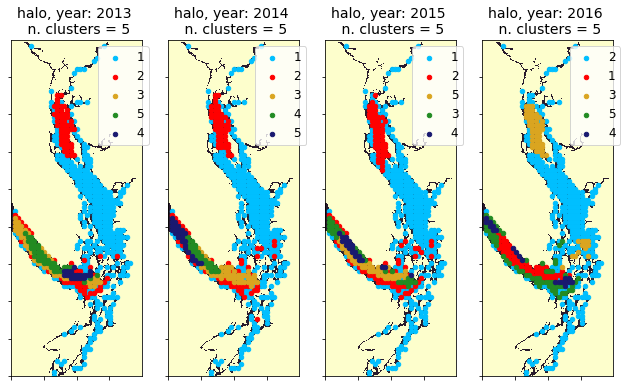

In [13]:
fact = 0.6
fig, axs = plt.subplots(1,4,figsize=(18*fact,15*fact))

vp.clusters(axs[0],'2013','halo',5)
vp.clusters(axs[1],'2014','halo',5)
vp.clusters(axs[2],'2015','halo',5)
vp.clusters(axs[3],'2016','halo',5)

var = 'halo'
year = 2013
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2013_reass = np.zeros_like(cl_this)
cldes_2013_reass[cl_this == 3] = 1
cldes_2013_reass[cl_this == 4] = 5
cldes_2013_reass[cl_this == 1] = 3
cldes_2013_reass[cl_this == 2] = 4
cldes_2013_reass[cl_this == 5] = 2

year = 2014
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2014_reass = np.zeros_like(cl_this)
cldes_2014_reass[cl_this == 3] = 5
cldes_2014_reass[cl_this == 5] = 1
cldes_2014_reass[cl_this == 1] = 3
cldes_2014_reass[cl_this == 2] = 4
cldes_2014_reass[cl_this == 4] = 2

year = 2015
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2015_reass = np.zeros_like(cl_this)
cldes_2015_reass[cl_this == 3] = 1
cldes_2015_reass[cl_this == 4] = 2
cldes_2015_reass[cl_this == 1] = 3
cldes_2015_reass[cl_this == 2] = 4
cldes_2015_reass[cl_this == 5] = 5

year = 2016
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2016_reass = np.zeros_like(cl_this)
cldes_2016_reass[cl_this == 4] = 1
cldes_2016_reass[cl_this == 5] = 2
cldes_2016_reass[cl_this == 2] = 3
cldes_2016_reass[cl_this == 3] = 4
cldes_2016_reass[cl_this == 1] = 5




## chceck that reassigning worked

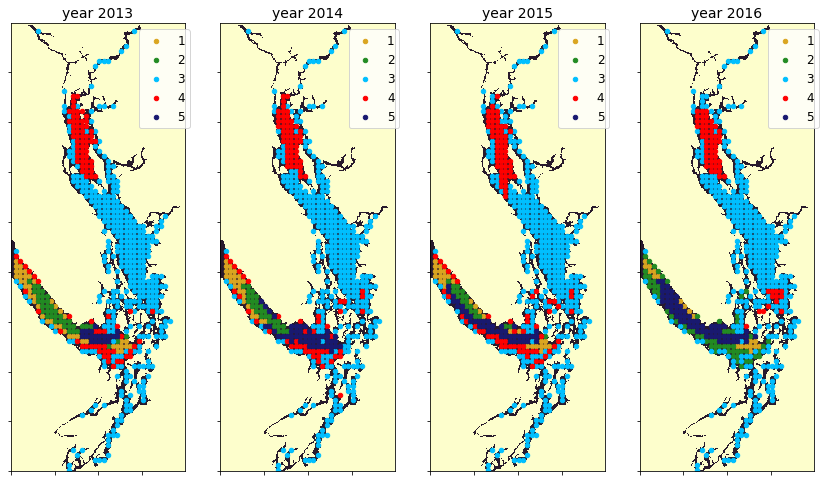

In [14]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']
    
reload(vp)
fact = 0.8
fig, axs = plt.subplots(1,4,figsize=(18*fact,15*fact))

vp.clusters_basic(axs[0],'2013','halo',5,cldes_2013_reass, colors)
vp.clusters_basic(axs[1],'2014','halo',5,cldes_2014_reass, colors)
vp.clusters_basic(axs[2],'2015','halo',5,cldes_2015_reass, colors)
vp.clusters_basic(axs[3],'2016','halo',5,cldes_2016_reass, colors)

In [15]:
print(np.where(cldes_2014_reass==2))
print(np.where(cldes_2016_reass==2))

(array([ 30,  35,  36,  37,  38,  44,  45,  46,  47,  50,  51,  52,  53,
        56,  57,  58,  63,  64,  68,  69,  72,  73,  82,  83,  84,  96,
        97, 117]),)
(array([  1,   2,   5,   7,   8,   9,  12,  14,  15,  16,  19,  21,  22,
        23,  26,  32,  33,  39,  42,  48,  61,  66,  71,  81,  85,  95,
       115, 138, 139, 159, 160, 161, 184, 189, 207, 210, 223, 224, 227,
       244, 245, 246, 249, 269, 270, 271, 277, 278, 301, 304, 314, 336,
       338, 346, 367, 372, 394, 421, 422, 446, 470]),)


In [16]:
pickle.dump(cldes_2013_reass, open('./pkls/HALO_clno_5_2013_reass.pkl', 'wb'))
pickle.dump(cldes_2014_reass, open('./pkls/HALO_clno_5_2014_reass.pkl', 'wb'))
pickle.dump(cldes_2015_reass, open('./pkls/HALO_clno_5_2015_reass.pkl', 'wb'))
pickle.dump(cldes_2016_reass, open('./pkls/HALO_clno_5_2016_reass.pkl', 'wb'))

### after reass reloading

In [17]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)


<module 'pipvis' from '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pipvis.py'>

In [18]:
cldes_2013_reass = pickle.load(open('./pkls/HALO_clno_5_2013_reass.pkl', 'rb'))  
cldes_2014_reass = pickle.load(open('./pkls/HALO_clno_5_2014_reass.pkl', 'rb'))  
cldes_2015_reass = pickle.load(open('./pkls/HALO_clno_5_2015_reass.pkl', 'rb'))  
cldes_2016_reass = pickle.load(open('./pkls/HALO_clno_5_2016_reass.pkl', 'rb'))  

colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']

cl_2013 = pickle.load(open('./pkls/halo_clustmat_2013.pkl', 'rb'))
cl_2014 = pickle.load(open('./pkls/halo_clustmat_2014.pkl', 'rb'))
cl_2015 = pickle.load(open('./pkls/halo_clustmat_2015.pkl', 'rb'))
cl_2016 = pickle.load(open('./pkls/halo_clustmat_2016.pkl', 'rb'))
sig_2013 = pickle.load(open('./pkls/halo_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/halo_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/halo_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/halo_datamat_2016.pkl', 'rb'))


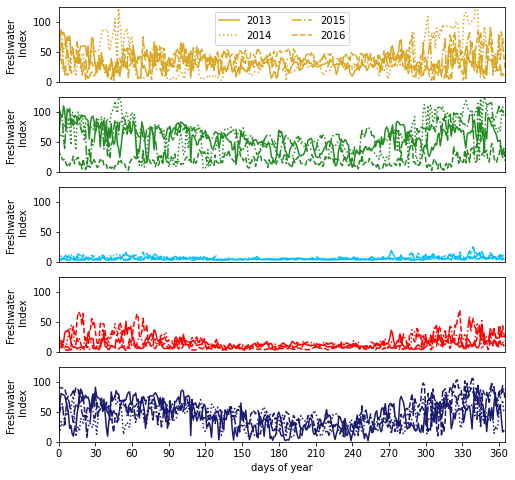

In [20]:
# linestyl = ['-',':','-.','--']
# sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
# clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
# clustnos = [5,5,5,5]
# nodays =  [365,365,365,366]
# labs = ['2013','2014','2015','2016']
# t_ylim = 140
# t_ylab = 'halocline (m)'

# fact = 2
# fig = plt.figure(figsize=(7*fact, 7*fact))

# ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
# vp.clusters_basic(ax1,'2013','halo',5,cldes_2013_reass, colors)
# ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
# vp.clusters_basic(ax1,'2014','halo',5,cldes_2014_reass, colors)
# ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
# vp.clusters_basic(ax1,'2015','halo',5,cldes_2015_reass, colors)
# ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
# vp.clusters_basic(ax1,'2016','halo',5,cldes_2016_reass, colors)

# ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
# clustdes = [1,1,1,1]
# for i in range(0,len(clustdes)):
#     tclmat = clustmats[i]; clustno = clustnos[i]
#     tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
#     ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[1],\
#                 linestyle = linestyl[i], label = labs[i])
# ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
# ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
# ax1.set_yticks(np.arange(0,t_ylim,25));
# ax1.legend(loc = 'best', ncol = 2)
# ax1.grid()

# ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
# clustdes = [2,2,2,2]
# for i in range(0,len(clustdes)):
#     tclmat = clustmats[i]; clustno = clustnos[i]
#     tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
#     ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[2],\
#                 linestyle = linestyl[i], label = labs[i])

# ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
# ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
# ax1.set_yticks(np.arange(0,t_ylim,25));
# ax1.legend(loc = 'best', ncol = 2)
# ax1.grid()

# ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
# clustdes = [3,3,3,3]
# for i in range(0,len(clustdes)):
#     tclmat = clustmats[i]; clustno = clustnos[i]
#     tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
#     ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[3],\
#                 linestyle = linestyl[i], label = labs[i])
# ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
# ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
# ax1.set_yticks(np.arange(0,t_ylim,25));
# ax1.grid()

# ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
# clustdes = [4,4,4,4]
# for i in range(0,len(clustdes)):
#     tclmat = clustmats[i]; clustno = clustnos[i]
#     tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
#     ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[4],\
#                 linestyle = linestyl[i], label = labs[i])
# ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
# ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
# ax1.set_yticks(np.arange(0,t_ylim,25));
# ax1.grid()

# ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
# clustdes = [5,5,5,5]
# for i in range(0,len(clustdes)):
#     tclmat = clustmats[i]; clustno = clustnos[i]
#     tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
#     ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[5],\
#                 linestyle = linestyl[i], label = labs[i])
# ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
# ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
# ax1.set_yticks(np.arange(0,t_ylim,25));
# ax1.grid()

# plt.tight_layout()

# var = 'HALO'
# fig.savefig(f'./paper_figs/{var}_4Y_CLUSTERS_SEP.png', bbox_inches='tight')

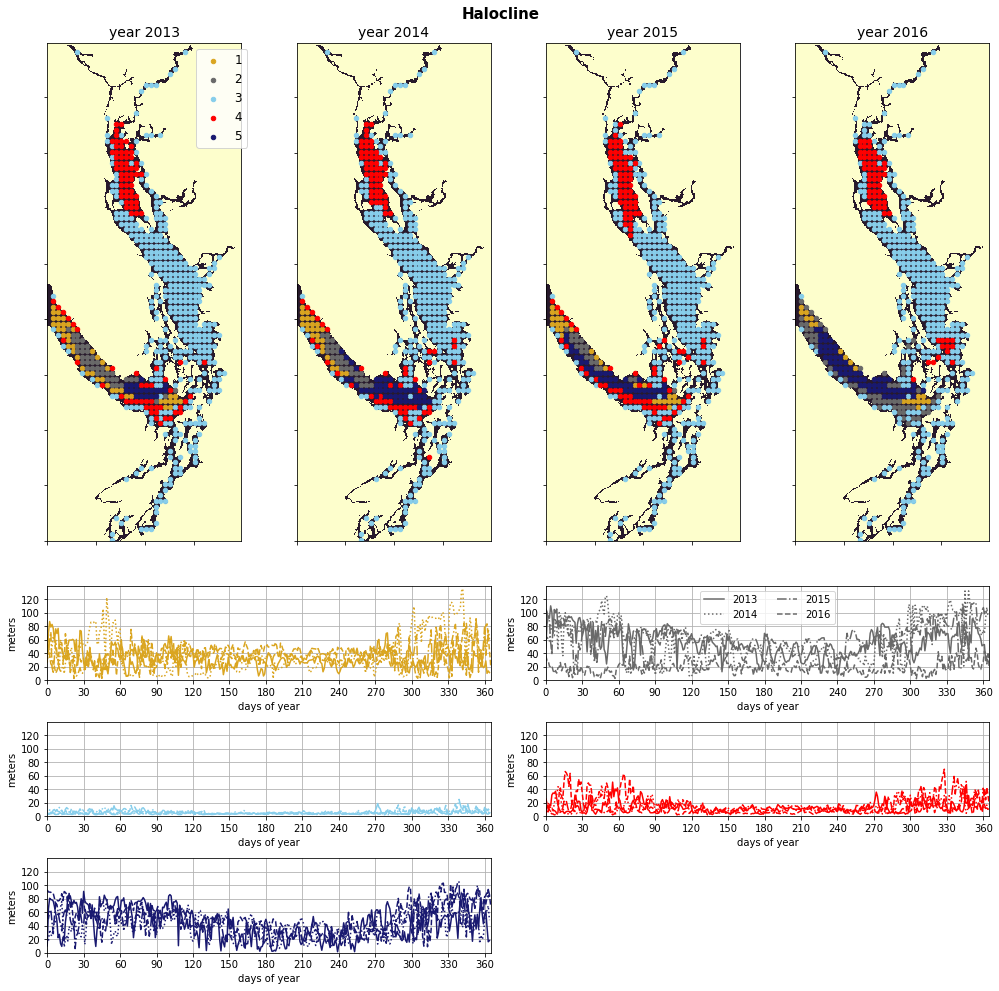

In [21]:
colors = ['white',
          'goldenrod',
          'dimgray',
          'skyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']


reload(vp)
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']
t_ylim = 140; spac = 20
t_ylab = 'meters'

fact = 2
fig = plt.figure(figsize=(7*fact, 7*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','wind',5,cldes_2013_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','wind',5,cldes_2014_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','wind',5,cldes_2015_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','wind',5,cldes_2016_reass, colors, legend = False)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_yticks(np.arange(0,t_ylim,spac));ax1.grid()
# ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])

ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_yticks(np.arange(0,t_ylim,spac));ax1.grid()
ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_yticks(np.arange(0,t_ylim,spac));ax1.grid()

ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_yticks(np.arange(0,t_ylim,spac));ax1.grid()

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_yticks(np.arange(0,t_ylim,spac)); ax1.grid()

plt.suptitle('Halocline', fontsize = 15, weight = 'bold', y = 0.98)
plt.tight_layout()



var = 'HALO'
fig.savefig(f'./paper_figs/{var}_4Y_CLUSTERS_SEP.jpg', bbox_inches='tight', dpi = 300)

/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pipvis.py:115: RuntimeWarning: Mean of empty slice
  mean_signal = np.nanmean(signalmat, axis = 0)


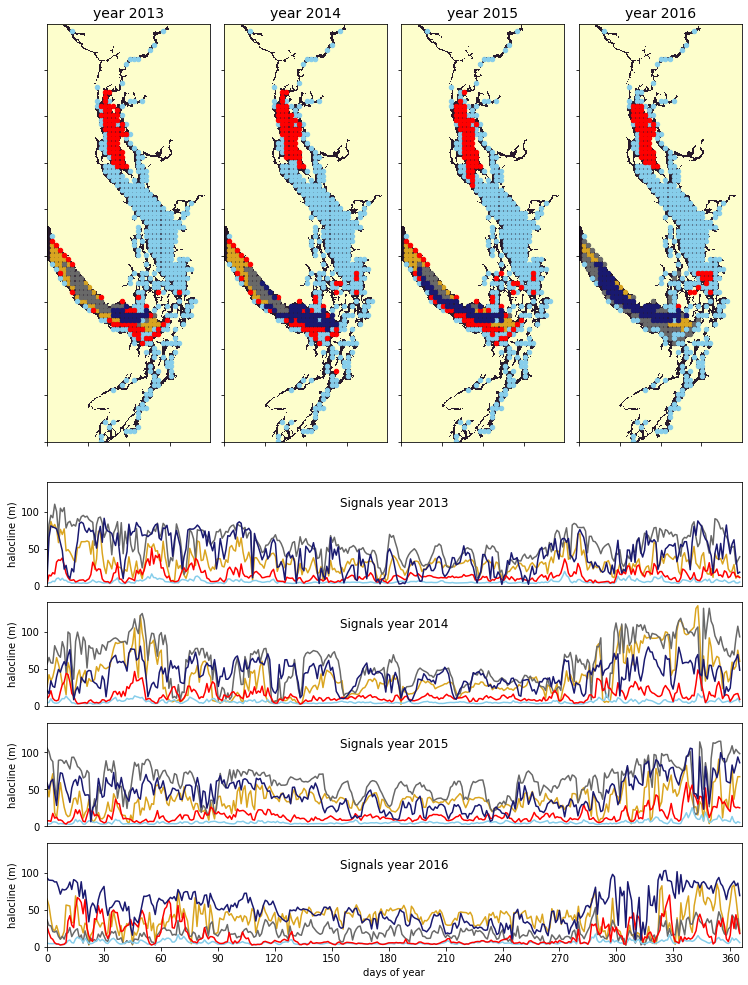

In [22]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']
t_ylim = 140
t_ylab = 'halocline (m)'

fact = 1.5
fig = plt.figure(figsize=(7*fact, 9.25*fact))

ax1 = plt.subplot2grid((8,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','halo',5,cldes_2013_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','halo',5,cldes_2014_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','halo',5,cldes_2015_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','halo',5,cldes_2016_reass, colors, legend = False)

ax1 = plt.subplot2grid((8,4), (4,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 0; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2013', y = 0.7)

ax1 = plt.subplot2grid((8,4), (5,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5,6]; tn = 1; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2014', y = 0.7)

ax1 = plt.subplot2grid((8,4), (6,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 2; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2015', y = 0.7)

ax1 = plt.subplot2grid((8,4), (7,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 3; noday = 366
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2016', y = 0.7)


plt.tight_layout()

var = 'HALO'
fig.savefig(f'./paper_figs/{var}_4Y_YEARS_SEP.png', bbox_inches='tight')

In [23]:
def add_subplot_border(ax, width=1, color=None ):

    fig = ax.get_figure()

    # Convert bottom-left and top-right to display coordinates
    x0, y0 = ax.transAxes.transform((0, 0))
    x1, y1 = ax.transAxes.transform((1, 1))

    # Convert back to Axes coordinates
    x0, y0 = ax.transAxes.inverted().transform((x0, y0))
    x1, y1 = ax.transAxes.inverted().transform((x1, y1))

    rect = plt.Rectangle(
        (x0, y0), x1-x0, y1-y0,
        color=color,
        transform=ax.transAxes,
        zorder=-1,
        lw=2*width+1,
        fill=None,
    )
    fig.patches.append(rect)


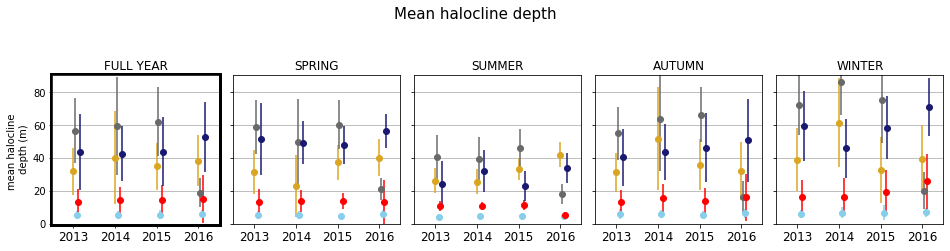

In [24]:
fact = 0.7

fs = 12
#season definitions
#spring march 1 to may 31
spr_st = 59; spr_e = 151; sum_st = 151; sum_e = 243;
aut_st = 243; aut_e = 334;

sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
yrs = [2013,2014,2015,2016]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
clustdes = [1,2,3,4,5]; 
fig = plt.figure(figsize=(19*fact, 4.6*fact))

ax1 = plt.subplot2grid((1,5), (0,0), colspan=1, rowspan=1) 
#noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]; noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        yrmean = np.nanmean(tmean); yrstd = np.nanstd(tmean)
        ax1.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')

ax1.set_xlim([2012.5,2016.5])
ax1.set_ylim([0,90])
ax1.yaxis.grid(True)
ax1.set_xticks([2013,2014,2015,2016])
ax1.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax1.set_ylabel('mean halocline \n depth (m)')
ax1.set_title('FULL YEAR', fontsize = fs)
add_subplot_border(ax1, width=2, color='black' )

ax2 = plt.subplot2grid((1,5), (0,1), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        yrmean = np.nanmean(tmean[spr_st:spr_e]); yrstd = np.nanstd(tmean[spr_st:spr_e])
        ax2.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,90])
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('SPRING', fontsize = fs)

ax2 = plt.subplot2grid((1,5), (0,2), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        yrmean = np.nanmean(tmean[sum_st:sum_e]); yrstd = np.nanstd(tmean[sum_st:sum_e])
        ax2.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,90])
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('SUMMER', fontsize = fs)

ax2 = plt.subplot2grid((1,5), (0,3), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        yrmean = np.nanmean(tmean[aut_st:aut_e]); yrstd = np.nanstd(tmean[aut_st:aut_e])
        ax2.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,90])
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('AUTUMN', fontsize = fs)

ax2 = plt.subplot2grid((1,5), (0,4), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        wintmean = np.concatenate((tmean[0:spr_st],tmean[aut_e:(np.size(tmean)-1)]),axis = 0)
        yrmean = np.nanmean(wintmean); yrstd = np.nanstd(wintmean)
        ax2.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,90])
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('WINTER', fontsize = fs)
plt.suptitle('Mean halocline depth', fontsize = fs+3, y = 1.07)
plt.tight_layout()


In [25]:
w = np.array([1,4,2])
w2 = np.array([1,2,3])

w3 = np.concatenate((w,w2),axis = 0 )
print(w3)

[1 4 2 1 2 3]


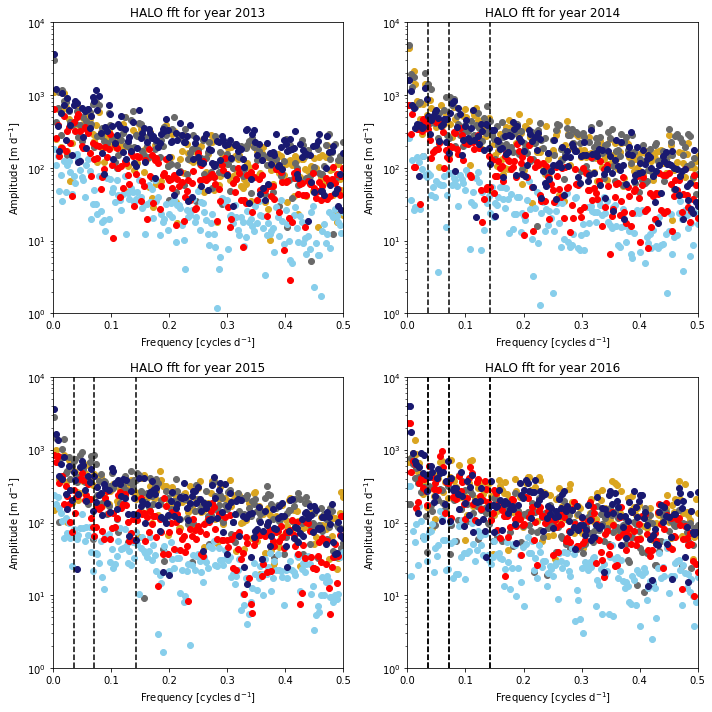

In [26]:
# Construct the frequency array (Nyquist frequency for hourly data in cph is 0.5)
xlim, ylim = [0, 0.5], [1,10000]
#frequency = np.linspace(-0.5, 0.5, nday)

# Perform the fft and apply fftshift (abs gives the real component)
# We have detrended ssh here by subtracting the mean
# Units are amplitude/frequency, or in this case m/h^{-1}
amplitude = abs(np.fft.fftshift(np.fft.fft(tmean - tmean.mean())))

# Make figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(10, 10), nrows = 2, ncols =2)


# Plot the results
for a in range(0,4):
    taxes = [ax1,ax2,ax3,ax4]
    sigs = [sig_2013,sig_2014,sig_2015,sig_2016]; ndays = [365,365,365,366]
    cls = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
    ax = taxes[a]; sig = sigs[a]; cl = cls[a]
    yrs = [2013,2014,2015,2016]
    nday = ndays[a]; yr = yrs[a]
    frequency = np.linspace(-0.5, 0.5, nday)
    for i in range(0,5):
        tmean = vp.cluster_patterns_mean(sig,cl,i+1,nday)
        amplitude = abs(np.fft.fftshift(np.fft.fft(tmean - tmean.mean())))
        ax.plot(frequency, amplitude, color = colors[i+1], marker = 'o', linestyle = '')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_yscale('log')
    ax.set_xlabel('Frequency [cycles d$^{-1}$]')
    ax.set_ylabel('Amplitude [m d$^{-1}$]')
    ax.set_title('HALO fft for year '+str(yr))



# Overlay semidiurnal and diurnal frequencies
for hour in [-7, -14, -28, 7, 14, 28]:
    ax.plot([1/hour, 1/hour], ylim, 'k--'); ax2.plot([1/hour, 1/hour], ylim, 'k--');
    ax3.plot([1/hour, 1/hour], ylim, 'k--'); ax4.plot([1/hour, 1/hour], ylim, 'k--')

plt.tight_layout()
plt.show()

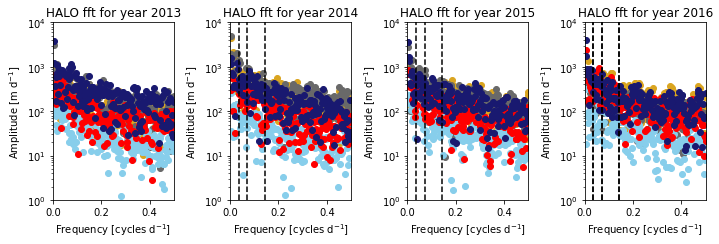

In [27]:
# Construct the frequency array (Nyquist frequency for hourly data in cph is 0.5)
xlim, ylim = [0, 0.5], [1,10000]
#frequency = np.linspace(-0.5, 0.5, nday)

# Perform the fft and apply fftshift (abs gives the real component)
# We have detrended ssh here by subtracting the mean
# Units are amplitude/frequency, or in this case m/h^{-1}
amplitude = abs(np.fft.fftshift(np.fft.fft(tmean - tmean.mean())))

# Make figure
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(figsize=(10, 3.5), nrows = 1, ncols =4)


# Plot the results
for a in range(0,4):
    taxes = [ax1,ax2,ax3,ax4]
    sigs = [sig_2013,sig_2014,sig_2015,sig_2016]; ndays = [365,365,365,366]
    cls = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
    ax = taxes[a]; sig = sigs[a]; cl = cls[a]
    yrs = [2013,2014,2015,2016]
    nday = ndays[a]; yr = yrs[a]
    frequency = np.linspace(-0.5, 0.5, nday)
    for i in range(0,5):
        tmean = vp.cluster_patterns_mean(sig,cl,i+1,nday)
        amplitude = abs(np.fft.fftshift(np.fft.fft(tmean - tmean.mean())))
        ax.plot(frequency, amplitude, color = colors[i+1], marker = 'o', linestyle = '')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_yscale('log')
    ax.set_xlabel('Frequency [cycles d$^{-1}$]')
    ax.set_ylabel('Amplitude [m d$^{-1}$]')
    ax.set_title('HALO fft for year '+str(yr))



# Overlay semidiurnal and diurnal frequencies
for hour in [-7, -14, -28, 7, 14, 28]:
    ax.plot([1/hour, 1/hour], ylim, 'k--'); ax2.plot([1/hour, 1/hour], ylim, 'k--');
    ax3.plot([1/hour, 1/hour], ylim, 'k--'); ax4.plot([1/hour, 1/hour], ylim, 'k--')

plt.tight_layout()
plt.show()

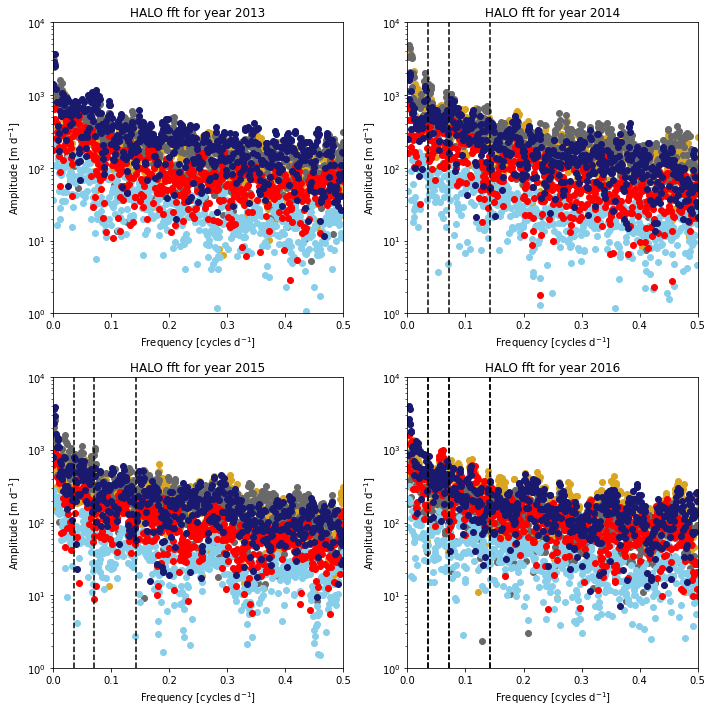

In [28]:
# Construct the frequency array (Nyquist frequency for hourly data in cph is 0.5)
xlim, ylim = [0, 0.5], [1,10000]
#frequency = np.linspace(-0.5, 0.5, nday)

# Perform the fft and apply fftshift (abs gives the real component)
# We have detrended ssh here by subtracting the mean
# Units are amplitude/frequency, or in this case m/h^{-1}
#amplitude = abs(np.fft.fftshift(np.fft.fft(tmean - tmean.mean())))

amplitude = abs((np.fft.fft(tmean - tmean.mean())))

# Make figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(10, 10), nrows = 2, ncols =2)


# Plot the results
for a in range(0,4):
    taxes = [ax1,ax2,ax3,ax4]
    sigs = [sig_2013,sig_2014,sig_2015,sig_2016]; ndays = [365,365,365,366]
    cls = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
    ax = taxes[a]; sig = sigs[a]; cl = cls[a]
    yrs = [2013,2014,2015,2016]
    nday = ndays[a]; yr = yrs[a]
    frequency = np.linspace(-0.5, 0.5, nday)
    for i in range(0,5):
        tmean = vp.cluster_patterns_mean(sig,cl,i+1,nday)
        amplitude = abs(np.fft.fftshift(np.fft.fft(tmean - tmean.mean(),3*np.size(tmean))))
        #print(np.shape(amplitude))
        frequency = np.linspace(-0.5, 0.5, np.size(amplitude))
        #amplitude = abs((np.fft.fft(tmean - tmean.mean())))
        ax.plot(frequency, amplitude, color = colors[i+1], marker = 'o', linestyle = '')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_yscale('log')
    ax.set_xlabel('Frequency [cycles d$^{-1}$]')
    ax.set_ylabel('Amplitude [m d$^{-1}$]')
    ax.set_title('HALO fft for year '+str(yr))



# Overlay semidiurnal and diurnal frequencies
for hour in [-7, -14, -28, 7, 14, 28]:
    ax.plot([1/hour, 1/hour], ylim, 'k--'); ax2.plot([1/hour, 1/hour], ylim, 'k--');
    ax3.plot([1/hour, 1/hour], ylim, 'k--'); ax4.plot([1/hour, 1/hour], ylim, 'k--')

plt.tight_layout()
plt.show()

(array([ 55., 136., 176., 148., 148.,  88.,  98.,  53.,  26.,  32.,  26.,
         16.,  12.,  10.,   8.,  14.,   4.,   6.,   0.,   0.,   2.,   8.,
          2.,   2.,   4.,   0.,   0.,   4.,   2.,   2.,   0.,   2.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([4.83169060e-13, 3.95155317e+01, 7.90310635e+01, 1.18546595e+02,
        1.58062127e+02, 1.97577659e+02, 2.37093190e+02, 2.76608722e+02,
        3.16124254e+02, 3.55639786e+02, 3.95155317e+02, 4.34670849e+02,
        4.74186381e+02, 5.13701913e+02, 5.53217444e+02, 5.92732976e+02,
        6.32248508e+02, 6.7176

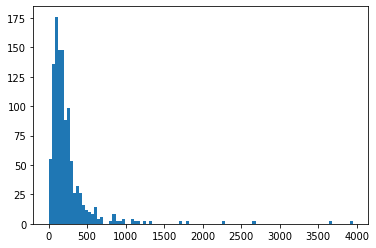

In [29]:
plt.hist(amplitude,100)#(np.histogram(amplitude))

173.11448669433594


(array([2.8348e+04, 3.5440e+03, 1.6990e+03, 1.4220e+03, 5.9100e+02,
        4.1300e+02, 0.0000e+00, 5.9000e+01, 2.4000e+01, 3.5000e+01]),
 array([  0.5000003 ,  17.76144894,  35.02289758,  52.28434622,
         69.54579486,  86.8072435 , 104.06869214, 121.33014078,
        138.59158942, 155.85303805, 173.11448669]),
 <BarContainer object of 10 artists>)

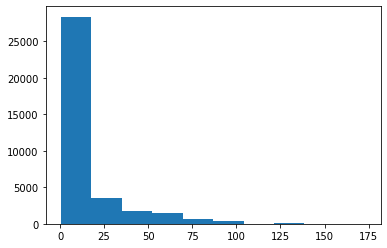

In [30]:
NS_14 = sig_2014[cldes_2014_reass == 4,:]

print(np.max(NS_14))

plt.hist(np.ravel(NS_14))

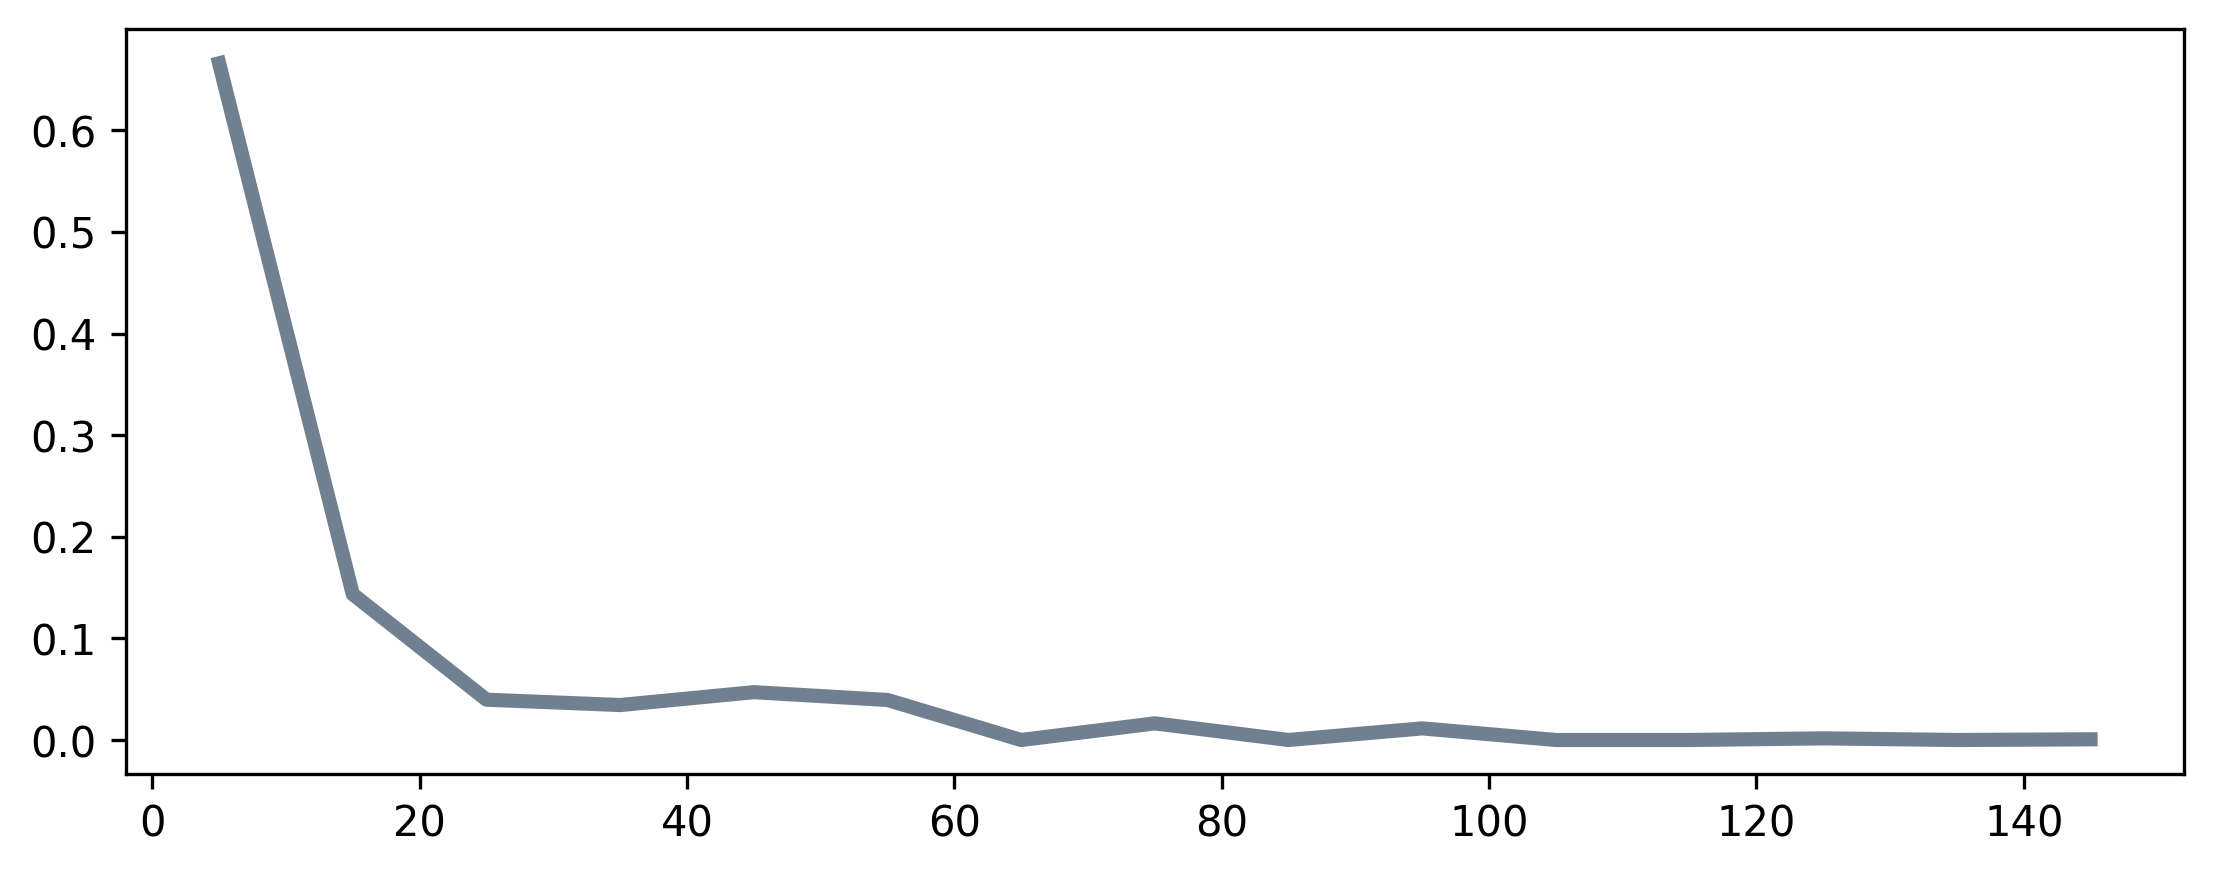

In [31]:
# csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))
# csize[BR3_summer_3mon > 1e10 ] = 0


# BR3_summer_nn = BR3_summer_3mon[BR3_summer_3mon<1e10]
# BR3_winter_nn = BR3_winter_3mon[BR3_winter_3mon<1e10]
# PI5_summer_nn = PI5_summer_3mon[PI5_summer_3mon<1e10]
# PI5_winter_nn = PI5_winter_3mon[PI5_winter_3mon<1e10]



# csize_nn = csize[BR3_summer_3mon<1e10]
# csize_nn[np.isnan(csize_nn)] = 0


nbins = 15
NS_14, bins = np.histogram(np.ravel(NS_14), bins=nbins, range = [0, 150])


bin_cent = bins + (bins[1]-bins[0])/2
tot_count = np.sum(NS_14)

fig = plt.figure(figsize=(19/2.54, (23/3)/2.54), dpi = 300)
ax6 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1)

ax6.plot(bin_cent[0:nbins],np.ravel(NS_14)/tot_count, color = 'slategray', lw = 3.4,label = 'present-day \n winter mean')
# ax6.plot(bin_cent[0:nbins],hist_PI5_winter/tot_count, \
#          color = 'slategray', lw = 3.4, linestyle = '--', label = 'PI - winter mean')
# ax6.plot(bin_cent[0:nbins],hist_BR3_summer/tot_count, color = 'springgreen', lw = 3.4,label = 'present-day \n summer mean')
# ax6.plot(bin_cent[0:nbins],hist_PI5_summer/tot_count, \
#          color = 'springgreen', lw = 3.4, linestyle = '--', label = 'PI - summer mean')
# ax6.legend(loc = 'best', fontsize = 8)
# ax6.set_xlim([0,3.5])
# ax6.set_title('$\Omega_{arag}$ distribution', fontsize = 11)
# ax6.axvline(x = 1, color = 'red', lw = 2)
# ax6.set_xlabel('$\Omega_{arag}$',  fontsize = 11)
# ax6.set_ylabel('proportion of domain', fontsize = 11)
plt.tight_layout()

In [32]:
def halo_de(nemo,grid,ts_x,ts_y):
    import numpy as np
    
    #retreive distances between grid cells ("distance between this grid cell and the one before it")

    delt_z = grid.variables['e3t_1d'][0,:]
    #remove the stupid singletons
    
    sal = nemo.vosaline[0,:,ts_y:ts_y+1,ts_x:ts_x+1]
    depth = nemo.deptht
    dv = depth.values[:]
    sv = sal.values[:]
    sv = np.squeeze(sv)

    #for this grid cell, where do we no longer have salinity values?
    bottom = np.where(sv ==0)
    bottom = bottom[0]
    bottom = bottom[0]

    fxnl_sal = sv[0:bottom]
    fxnl_e3t = delt_z[0:bottom]
    fxnl_depth = dv[0:bottom]
    
    sal_gradient = np.zeros_like(fxnl_depth)

    #calculating gradient
    for i in range(1,bottom):
        sal_gradient[i] = (fxnl_sal[i]-fxnl_sal[i-1])/(0.5(fxnl_e3t[i]+fxnl_e3t[i-1]))
        
    mg = max(sal_gradient)
    #print(mg)

    halocline = np.where(sal_gradient == mg)
    halocline = np.squeeze(halocline)

    halocline = fxnl_depth[halocline]

    
    return halocline

In [33]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
print(grid)
print(grid['e3t_1d'][0,:])
print(grid['gdept_1d'][0,:])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    DOMAIN_number_total: 1
    DOMAIN_number: 0
    DOMAIN_dimensions_ids: [1 2]
    DOMAIN_size_global: [398 898]
    DOMAIN_size_local: [398 898]
    DOMAIN_position_first: [1 1]
    DOMAIN_position_last: [398 898]
    DOMAIN_halo_size_start: [0 0]
    DOMAIN_halo_size_end: [0 0]
    DOMAIN_type: BOX
    file_name: NEMO-forcing/grid/mesh_mask201702.nc
    TimeStamp: 14/03/2019 15:00:00 -0700
    Conventions: CF-1.6
    title: Salish Sea NEMO bathymetry_201702 Bathymetry Mesh Mask
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    source: NEMO-3.6 Salish Sea configuration
    references: https://salishsea.eos.ubc.ca/erddap/info/
https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/bathymetery_201702.nc

    history: [2019-03-14 15:00] ncks -4 -L4 -O mesh_mask.nc mesh_mask201702.nc
[2019-03-16 17:30] Added metadata to variable in preparation for creat